<a href="https://colab.research.google.com/github/dharsanakb/FML/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub scikit-learn pandas matplotlib seaborn

import kagglehub

# Download latest version
path = kagglehub.dataset_download("quantbruce/real-estate-price-prediction")

print("Path to dataset files:", path)

import os
import pandas as pd

# List files inside downloaded folder
print("Files in dataset folder:", os.listdir(path))

# Load CSV file (update name if different)
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))

print("\nDataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())

#Data Preprocessing
# Drop rows with missing target if any
df = df.dropna()

# Selecting numerical features (modify based on dataset columns)
numerical_features = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Remove target from feature list
if 'Y house price of unit area' in numerical_features:
    numerical_features.remove('Y house price of unit area')

X = df[numerical_features]
y = df['Y house price of unit area']


# PART A: LINEAR REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction
y_pred = lr_model.predict(X_test)

# Evaluation
print("\n===== Linear Regression Results =====")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


# PART B: NAÏVE BAYES CLASSIFICATION

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create Price Categories
df['PriceCategory'] = pd.qcut(df['Y house price of unit area'], q=3, labels=['Low','Medium','High'])

y_class = df['PriceCategory']

# Split again for classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Model
nb_model = GaussianNB()
nb_model.fit(X_train_c, y_train_c)

# Prediction
y_pred_c = nb_model.predict(X_test_c)

# Evaluation
print("\n===== Naïve Bayes Classification Results =====")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))


# FINAL COMPARISON

print("\n===== Model Comparison Summary =====")
print("Linear Regression is used for predicting exact house prices.")
print("Naïve Bayes is used for classifying houses into price categories.")

Using Colab cache for faster access to the 'real-estate-price-prediction' dataset.
Path to dataset files: /kaggle/input/real-estate-price-prediction
Files in dataset folder: ['Real estate.csv']

Dataset Preview:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit ar

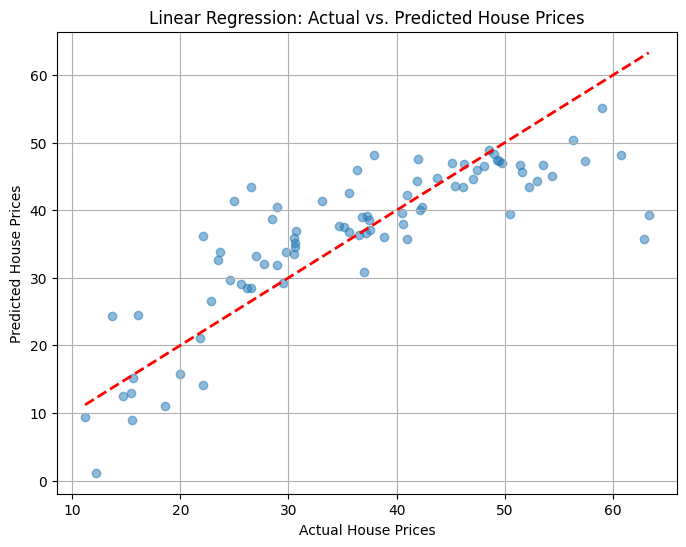

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Linear Regression: Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

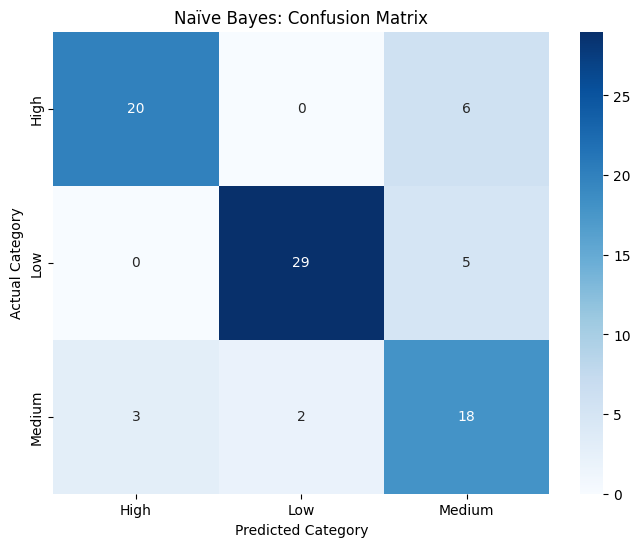

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_c, y_pred_c)

# Get the class labels
class_labels = nb_model.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Naïve Bayes: Confusion Matrix')
plt.show()

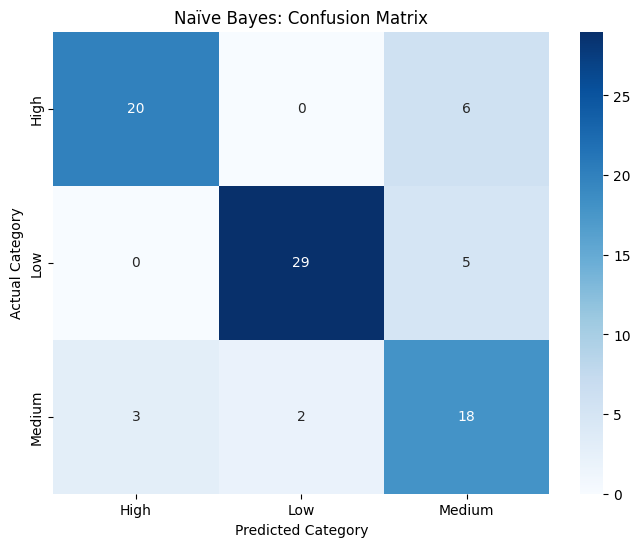

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_c, y_pred_c)

# Get the class labels
class_labels = nb_model.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Naïve Bayes: Confusion Matrix')
plt.show()